In [139]:
from sentence_transformers import SentenceTransformer
from langchain.document_loaders import PyPDFLoader
from sklearn.metrics.pairwise import cosine_similarity
import time

In [ ]:
model =  SentenceTransformer("dangvantuan/sentence-camembert-base")

In [140]:
path_chap4 = ""
path_chap33 = ""

In [141]:
paths = [path_chap4, path_chap33]
loaders = []
for path in paths:
  loaders.append(PyPDFLoader(path))

In [142]:
document = []
for loader in loaders:
  document.extend(loader.load())

In [143]:
doc = []
for i in range(len(document)):
    firstpart, secondpart = document[i].page_content[:len(document[i].page_content)//2], document[i].page_content[len(document[i].page_content)//2:]
    if (len(firstpart) or len(secondpart) != 0):
        doc.append(firstpart)
        doc.append(secondpart)

In [ ]:
doc

# Embed Corpus

In [146]:
start = time.time()
corpus_embeddings = model.encode(doc)
end = time.time()

In [147]:
print(end-start)

1.7607617378234863


In [148]:
corpus_embeddings

array([[ 0.0365066 ,  0.02416969,  0.01272693, ..., -0.00528995,
         0.07726508,  0.0841065 ],
       [-0.05503515,  0.03174418,  0.10671198, ..., -0.06531332,
         0.06938392,  0.02913106],
       [-0.03711544, -0.10954937, -0.06667554, ...,  0.08111404,
         0.07483519,  0.0250304 ],
       ...,
       [ 0.06077068,  0.0478485 ,  0.03472702, ...,  0.04173059,
         0.13272114,  0.03140427],
       [ 0.04218913, -0.11138716,  0.0915517 , ...,  0.0607506 ,
         0.09256912,  0.08933248],
       [ 0.08391162,  0.03973236,  0.04495587, ...,  0.00936253,
         0.0791582 ,  0.08532292]], dtype=float32)

# Embed Query

In [51]:
query = "Comment sont conduites les études organisationnelles et humaines sur le terrain ?"

In [105]:
query = "Quelle est l'influence de l'incident de mars 2002 ?"

In [168]:
query = "Quelles sont les caractéritiques de l'état d'une installation ?"

In [169]:
query_embedding = model.encode(query)

In [170]:
query_embedding

array([ 1.79900602e-02,  1.61599983e-02,  8.43081623e-02, -7.17683211e-02,
       -1.22219600e-01,  3.17805856e-02, -1.39479086e-01,  1.26359249e-02,
        5.41415662e-02, -4.72096391e-02,  6.09276555e-02,  3.10581252e-02,
       -1.07411534e-01,  1.79610662e-02,  1.83318630e-02, -7.01066107e-02,
        1.68308377e-01, -1.61661193e-01,  6.41094148e-02, -2.54820555e-01,
        1.54312514e-02, -9.64239538e-02, -1.35880947e-01,  1.94857225e-01,
        8.92991126e-02,  4.38509397e-02,  7.57375807e-02, -2.98391115e-02,
        1.32174492e-02, -2.45870277e-01,  5.70621677e-02, -5.17939329e-02,
       -8.60612933e-03, -1.75552055e-01,  1.15408354e-01, -4.56207665e-03,
       -1.43230595e-02, -1.31762713e-01, -9.41984877e-02, -2.28906870e-01,
        2.44101305e-02, -6.30334318e-02,  5.20799309e-04, -2.90756021e-02,
        7.95048028e-02, -1.11561723e-01, -1.41981423e-01, -2.02307403e-02,
        1.07164726e-01,  1.57701746e-02, -5.69566041e-02, -2.72452068e-02,
       -4.23376895e-02, -

# Cosine Similarities

In [171]:
similarities = cosine_similarity(query_embedding.reshape(1, -1), corpus_embeddings)

In [109]:
similarities

array([[ 0.16961162,  0.15760873,  0.20167403,  0.12725616,  0.22877002,
         0.17466374,  0.14239818,  0.12102249,  0.18933313,  0.19488996,
         0.23263079,  0.37644696,  0.21227227,  0.20112044,  0.20605871,
         0.10805633,  0.04596473,  0.11493517,  0.24680917,  0.15653881,
         0.11105223, -0.08302328,  0.19110394,  0.18170974,  0.14089544,
         0.13447474,  0.19842564,  0.1674348 ,  0.0993365 ,  0.0752909 ,
         0.28740546,  0.19306383,  0.20137307,  0.17581198,  0.24359483,
         0.21665555,  0.1404782 ,  0.19656554,  0.14901266,  0.20416817,
         0.12463602,  0.15587655,  0.21827447,  0.1565031 ,  0.24000418,
         0.10321765,  0.16260149,  0.1336617 ,  0.20535527,  0.17352694]],
      dtype=float32)

# Plot

In [110]:
# The function is not provided yet
import scatter_plot_chunk_query as d

In [172]:
y = similarities[0]
x = range(len(y))

In [173]:
chunk = ''

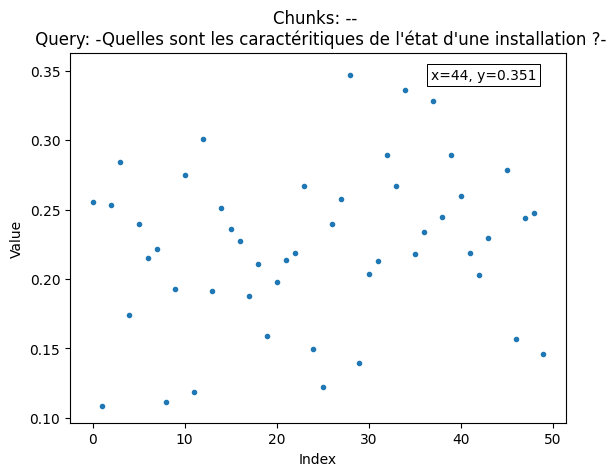

In [174]:
d.print_scatter_plot_domainquery(x, y, chunk, query)

# Top K

In [114]:
import numpy as np
import matplotlib.pyplot as plt

### Top 5

In [175]:
index_max = np.argsort(similarities[0])[::-1]

In [176]:
index_max[:5]

array([44, 28, 34, 37, 12])

In [177]:
top_5 = similarities[0,index_max[:5]]

In [178]:
top_5

array([0.3506914, 0.3469647, 0.3362579, 0.3285337, 0.300857 ],
      dtype=float32)

### Min 5

In [150]:
index_min = np.argsort(similarities[0])

In [151]:
index_min[:5]

array([21, 16, 29, 28, 45])

In [152]:
min_5 = similarities[0,index_min[:5]]

In [153]:
min_5

array([-0.08302328,  0.04596473,  0.0752909 ,  0.0993365 ,  0.10321765],
      dtype=float32)

## Print Top 5 Chunks for Comparison

In [ ]:
for chunk in index_max[:5]:
    print(query)
    print("CHUNK NUMBER ", chunk)
    print("------------------------")
    print(doc[chunk])
    print("---------------------------------------------------------------------")